![example](images/director_shot.jpeg)

# Microsoft Movie Analysis

**Authors:** Elena Burlando
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [10]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

##imdb title basics

In [6]:
# Here you run your code to explore the data
imdb_title_basics=pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
imdb_title_basics.shape

(146144, 6)

In [8]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [9]:
imdb_title_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


##imdb.title.ratings


In [11]:
imdb_title_ratings=pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [17]:
imdb_title_ratings.shape

(73856, 3)

##bom.movie_gross


In [15]:
bom_movie_gross=pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
bom_movie_gross.head() 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [16]:
bom_movie_gross.shape

(3387, 5)

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [6]:
# Here you run your code to clean the data

In [ ]:
#Merginng two dataframes: imdb_title_basics and imdb_title_ratings on common column 'tconst'. 
#It will be easier to parse through inforamtion once two dfs are combined. 

In [20]:
imdb_title_raiting_basics_df = imdb_title_basics.merge(imdb_title_ratings, on="tconst", how="inner")
imdb_title_raiting_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [21]:
imdb_title_raiting_basics_df.shape

(73856, 8)

In [23]:
imdb_title_raiting_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [24]:
#basic stats
imdb_title_raiting_basics_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


In [31]:
#list of 2019 movies 
imdb_2019_movies = imdb_title_raiting_basics_df.loc[imdb_title_raiting_basics_df['start_year']==2019, 'genres']
imdb_2019_movies

1                Biography,Drama
21                         Drama
26                   Documentary
94       Action,Adventure,Sci-Fi
106         Comedy,Drama,Romance
                  ...           
73850                Documentary
73851                Documentary
73852               Drama,Family
73854                        NaN
73855                Documentary
Name: genres, Length: 2180, dtype: object

In [34]:
imdb_2019_movies.unique()

array(['Biography,Drama', 'Drama', 'Documentary',
       'Action,Adventure,Sci-Fi', 'Comedy,Drama,Romance',
       'Action,Adventure,Comedy', 'Animation,Family,Fantasy',
       'Biography,Comedy,Drama', 'Horror,Mystery,Thriller',
       'Comedy,Horror,Sci-Fi', 'Action,Biography,Drama', nan,
       'Action,Comedy,Horror', 'Horror', 'Comedy,Fantasy',
       'Drama,Romance', 'Comedy', 'Action,Crime', 'Romance', 'Family',
       'Drama,Family', 'Comedy,Drama', 'Drama,Mystery',
       'Adventure,Fantasy', 'Documentary,Drama', 'Biography,Drama,Family',
       'Thriller', 'Adventure,Animation,Fantasy', 'Comedy,Romance',
       'Horror,Thriller', 'Action', 'Mystery', 'Action,Adventure,History',
       'Comedy,Horror', 'Animation,Family', 'Action,Thriller',
       'Comedy,Drama,Family', 'Drama,Fantasy,Horror', 'Musical',
       'Comedy,Documentary,Sport', 'Documentary,Music', 'Crime,Drama',
       'Documentary,History,War', 'Comedy,Crime', 'Comedy,Family',
       'Crime,Documentary,Drama', 'Act

In [54]:
imdb_2019_movies_above_1 = imdb_2019_movies.value_counts()
imdb_2019_movies_above_1.iloc[:40]

Drama                         392
Documentary                   333
Comedy                        213
Comedy,Drama                  107
Thriller                       77
Horror                         75
Comedy,Romance                 41
Horror,Thriller                38
Drama,Romance                  37
Action                         29
Drama,Thriller                 27
Romance                        23
Comedy,Drama,Romance           22
Comedy,Horror                  21
Action,Crime,Drama             20
Crime,Drama                    18
Family                         18
Action,Drama                   16
Action,Thriller                14
Documentary,Music              13
Animation                      13
Biography,Drama                13
Crime,Drama,Thriller           12
Action,Adventure,Comedy        11
Drama,Horror,Thriller          11
Action,Adventure,Animation     11
Sci-Fi                         11
Crime                          11
Drama,Horror,Mystery           10
Horror,Mystery

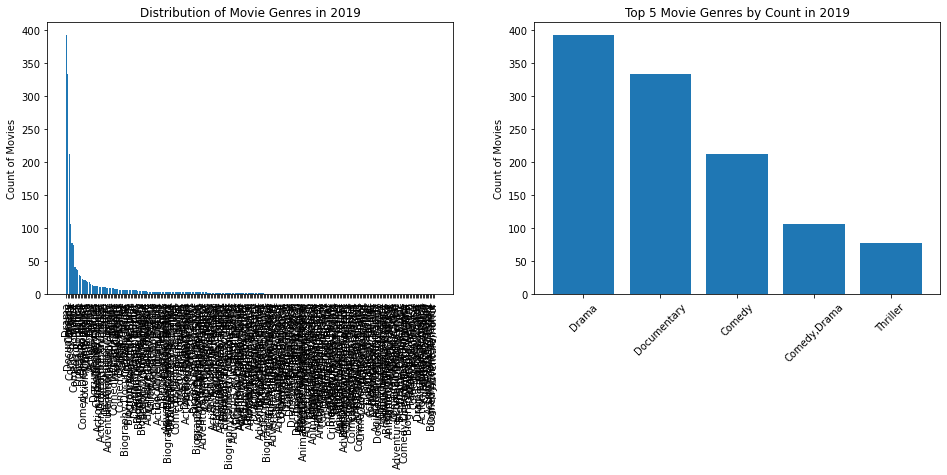

In [43]:
# Set up plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Create variables for easier reuse
value_counts = imdb_2019_movies.value_counts()
top_5_counts = value_counts.iloc[:5]

# Plot data
ax1.bar(value_counts.index, value_counts.values)
ax2.bar(top_5_counts.index, top_5_counts.values)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=45)
ax1.set_ylabel("Count of Movies")
ax2.set_ylabel("Count of Movies")
ax1.set_title("Distribution of Movie Genres in 2019")
ax2.set_title("Top 5 Movie Genres by Count in 2019");

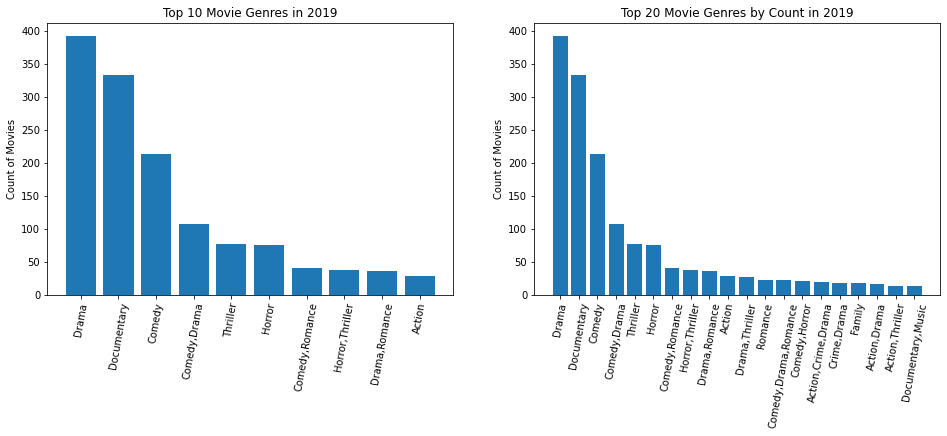

In [47]:
# Set up plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Create variables for easier reuse
value_counts = imdb_2019_movies.value_counts()
top_10_counts = value_counts.iloc[:10]
top_20_counts = value_counts.iloc[:20]

# Plot data
ax1.bar(top_10_counts.index, top_10_counts.values)
ax2.bar(top_20_counts.index, top_20_counts.values)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=80)
ax2.tick_params(axis="x", labelrotation=80)
ax1.set_ylabel("Count of Movies")
ax2.set_ylabel("Count of Movies")
ax1.set_title("Top 10 Movie Genres in 2019")
ax2.set_title("Top 20 Movie Genres by Count in 2019");

In [59]:
#most popular by numvotes
imdb_title_raiting_basics_df.numvotes.unique

<bound method Series.unique of 0          77
1          43
2        4517
3          13
4         119
         ... 
73851       6
73852     136
73853       8
73854       5
73855      11
Name: numvotes, Length: 73856, dtype: int64>

In [67]:
imdb_title_raiting_basics_df.groupby(['numvotes']).max()

AssertionError: 

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***